# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src='https://i.imgur.com/49FNOHj.jpg'>

# Import Statements

In [414]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [415]:
colors = pd.read_csv('data/colors.csv')
colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [416]:
colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [417]:
colors['name'].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [418]:
colors['is_trans'].value_counts()
# colors.groupby('is_trans').count()

is_trans
f    107
t     28
Name: count, dtype: int64

In [419]:
colors['name'].str.count('Trans').sum()

28

###Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src='https://i.imgur.com/aKcwkSx.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='https://i.imgur.com/whB1olq.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [420]:
sets = pd.read_csv('data/sets.csv')
sets.shape

(15710, 5)

In [421]:
sets.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


In [422]:
sets.tail(2)

,set_num,name,year,theme_id,num_parts
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [423]:
first_year = sets.year.min()
print(f'The first year LEGO started selling sets was: {first_year}')
print(f'The name of these sets were: \n{sets.loc[sets["year"] == first_year]}')
# print(sets['name'][sets.year == first_year])

The first year LEGO started selling sets was: 1949
The name of these sets were: 
      set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [424]:
(sets['year'] == first_year).nunique()

2

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [425]:
print(sets.sort_values('num_parts', ascending=False).head())

print(sets.nlargest(5, 'num_parts'))

        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922
        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [426]:
sets.groupby('year').count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [427]:
abs(sets.loc[sets.year == 1955].nunique()['set_num'] - sets.loc[sets.year == 2019].nunique()['set_num'])

812

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

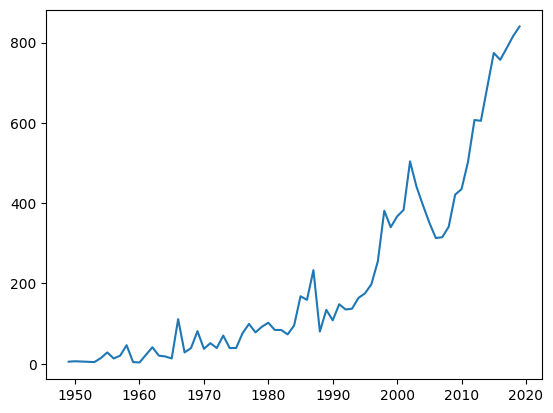

In [428]:
sets_by_year = sets.groupby('year')['set_num'].count()
plt.plot(sets_by_year[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [429]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id':'unique_themes'}, inplace=True)
themes_by_year

,unique_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

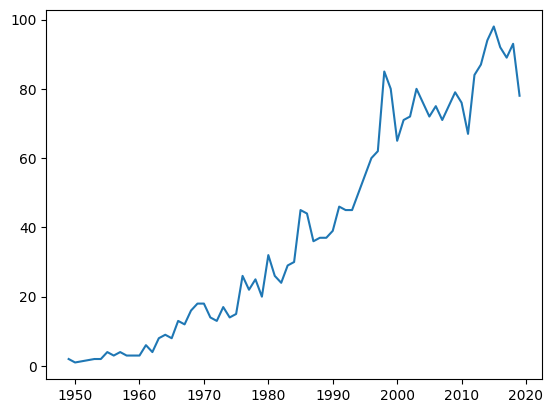

In [430]:
plt.plot(themes_by_year[:-2])

### Line Charts with Two Seperate Axes

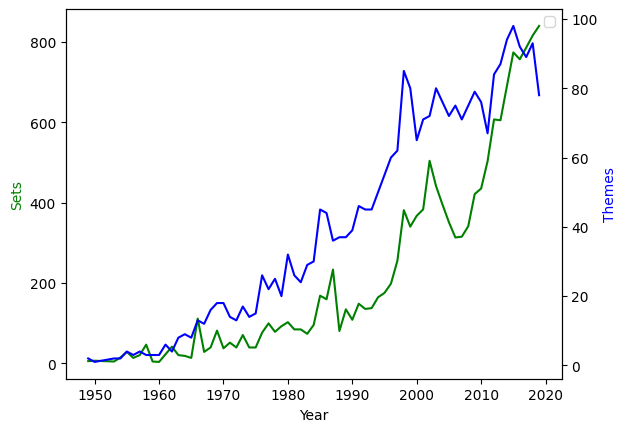

In [431]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year[:-2], color='g')
ax2.plot(themes_by_year[:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Sets', color='green')
ax2.set_ylabel('Themes', color='blue')
ax1.legend()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [432]:
parts_by_year = sets.groupby('year').agg({'num_parts': pd.Series.mean})
print(parts_by_year.head())

      num_parts
year           
1949  99.600000
1950   1.000000
1953  13.500000
1954  12.357143
1955  36.607143


In [433]:
print(parts_by_year.loc[1954])
print(parts_by_year.loc[2017])

num_parts    12.357143
Name: 1954, dtype: float64
num_parts    221.840967
Name: 2017, dtype: float64


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

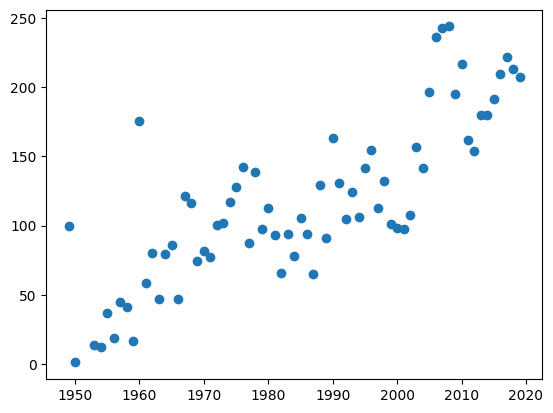

In [434]:
plt.scatter(parts_by_year.index[:-2], parts_by_year['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src='https://i.imgur.com/Sg4lcjx.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [435]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [436]:
star_wars_ids = themes.loc[themes['name'] == 'Star Wars']['id']
print(star_wars_ids)

17      18
150    158
174    209
211    261
Name: id, dtype: int64


In [437]:
sets.loc[sets['theme_id'].isin(star_wars_ids)]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [438]:
print(f"{sets[sets['theme_id'] == 18]}\n{sets[sets['theme_id'] == 18].shape}")
print(f"{sets[sets['theme_id'] == 158]}\n{sets[sets['theme_id'] == 158].shape}")
print(f"{sets[sets['theme_id'] == 209]}\n{sets[sets['theme_id'] == 209].shape}")
print(f"{sets[sets['theme_id'] == 261]}\n{sets[sets['theme_id'] == 261].shape}")

       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
(11, 5)
           set_num                                      

### Merging (i.e., Combining) DataFrames based on a Key


In [439]:
theme_set_count = sets['theme_id'].value_counts()
theme_set_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [440]:
theme_set_count = pd.DataFrame({'id': theme_set_count.index,
                                'num_sets': theme_set_count.values})

In [441]:
theme_set_count.shape

(571, 2)

In [462]:
merged_df = pd.merge(theme_set_count, themes, on='id')
print(merged_df.shape)
print(merged_df.head())

(571, 4)
    id  num_sets       name  parent_id
0  158       753  Star Wars        NaN
1  501       656       Gear        NaN
2  494       398    Friends        NaN
3  435       356    Ninjago        NaN
4  503       329  Key Chain      501.0


In [463]:
merged_df = pd.merge(themes, theme_set_count, on='id')
print(merged_df.shape)
print(merged_df.head())

(571, 4)
   id            name  parent_id  num_sets
0   1         Technic        NaN       167
1   2  Arctic Technic        1.0         4
2   3     Competition        1.0        18
3   4  Expert Builder        1.0        39
4   5           Model        1.0        12


<BarContainer object of 10 artists>

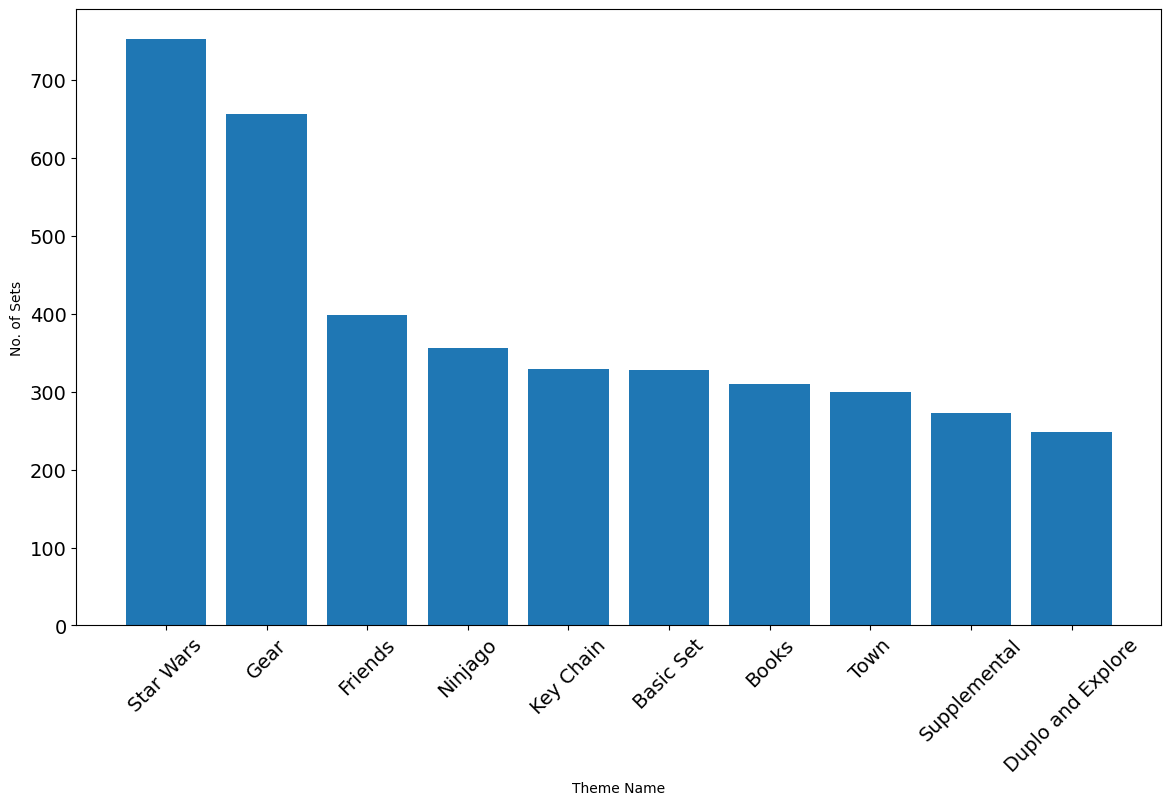

In [471]:
merged_df.sort_values(by='num_sets', ascending=False, inplace=True)
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Theme Name')
plt.ylabel('No. of Sets')
plt.bar(merged_df['name'][:10], merged_df['num_sets'][:10])